Here is the model for the Multilayer Perceptron Algorithm

In [1]:
import sys
import os
from pathlib import Path  # Import Path for use later

# 1. Add the project root's 'src' directory to the Python path
# Assumes the notebook is 3 levels deep from the project root.
current_dir = os.getcwd()
project_root = os.path.abspath(os.path.join(current_dir, os.pardir, os.pardir, os.pardir))
src_path = os.path.join(project_root, 'src')

if src_path not in sys.path:
    sys.path.append(src_path)
    print(f"Added project source directory to sys.path: {src_path}")

Added project source directory to sys.path: /Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src


In [2]:
# Import standard packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, classification_report, precision_recall_curve)
from sklearn.decomposition import PCA


# Import the necessary functions from src.
from rice_ml.processing.preprocessing import (load_and_prepare_data, 
                                              build_preprocessor_perceptron)
from rice_ml.supervised_learning.multilayer_perceptron import (train_mlp,
                                                               evaluate_model,
                                                               plot_pca_representation,
                                                               plot_precision_recall,
                                                               plot_training_loss)

# Note: Any printing/plotting from the `run code` section of your module will appear here.

In [3]:
# Next, you must load in the data

# set path to find dataset
repo_root = Path("/Users/doriolson/Desktop/repos/CMOR_438_Final_Repository")
data_path = Path("../../../Data/adult.csv")

# load data
df = load_and_prepare_data(data_path)

/Users/ruchitiwari/Desktop/Final CMOR 438/CMOR_438_Final_Repository/src/rice_ml/processing/preprocessing.py:606: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


Now we get to the actual training and evaluation of the Multilayer perceptron. 80% of the data is used for training, while the other 20% is kept separate for testing. In each epoch, the inputs are passed through the layers and given the resulting weights. Once the output is determined given our threshold, the algorithm then tests to see if the answer was correct, and propogates back through with an update if not. 

In [4]:
# train the MLP
model, X_test, y_test = train_mlp(df)


/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


Once the model is trained, we can now run the evaluation to see how accurate and efficient the MLP was at learning this data. 

In [5]:
# evaluate the MLP
evaluate_model(model, X_test, y_test)

Accuracy: 0.8476814412938888
Precision: 0.7073170731707317
Recall: 0.6201881950384944
F1 Score: 0.6608933454876937

Confusion Matrix:
[[6831  600]
 [ 888 1450]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7431
           1       0.71      0.62      0.66      2338

    accuracy                           0.85      9769
   macro avg       0.80      0.77      0.78      9769
weighted avg       0.84      0.85      0.84      9769



/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


## Visualizations
We can also create an assortment of visualizations to determine the effectiveness of the model. The code for these visualizations is once again in the src file, but here we can call the functions and discuss the results.

The first graph is a Principal Component Analysis (PCA) of the Projection of Learned Representation. This helps simplify the data into a format that we can understand more easily while still being able to interpret and draw findings from the data. A PCA picks two components that best influences our variable of interest (income) to see if there are patterns that can determine how to predict income. From this PCA, we can see a lot of overlaps between the income variables within the larger cluster, but there is enough of a separation between the colors in the large cluster to indicate that there is a slightly distinguishable pattern or method of determining income due to these other factors. 

/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: divide by zero encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: overflow encountered in matmul
  X_transformed = X @ self.components_.T
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_base.py:148: RuntimeWarning: invalid value enc

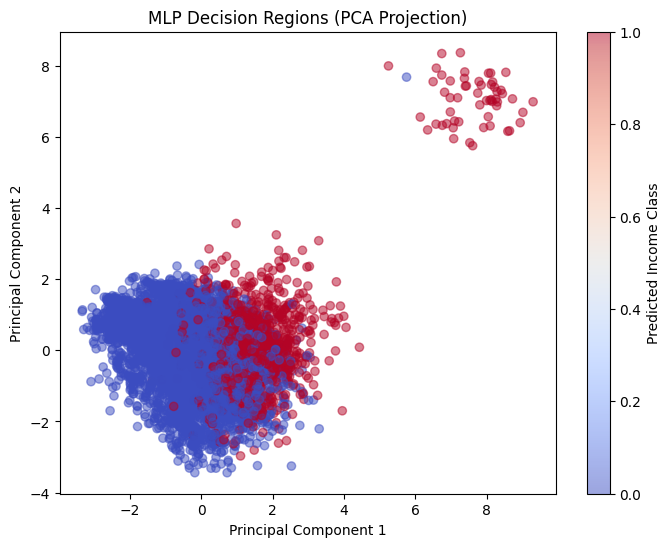

In [6]:
plot_pca_representation(model, X_test, y_test)


The second graph is a Training Loss Model which shows the convergence of data, or how many iterations it took the algorithm to understand the data. After the first iteration, the graph shows a pretty steady linear decline in the relationship between training loss and iterations, meaning the more iterations the MLP runs, the lower the training loss. 

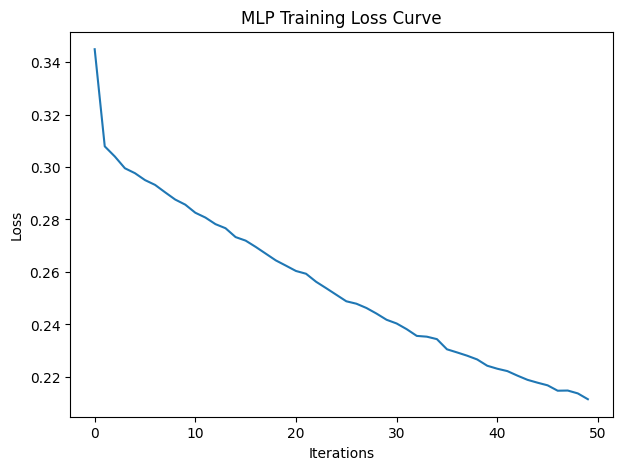

In [7]:
plot_training_loss(model)

The final graph here is a Precision-Recall Curve, which is helpful when data is imbalanced. As we saw in the PCA curve, this adult income dataset is a bit unbalanced and thus this can be helpful. This graph measures the precision of the MLP, specifically the rate of false positives and true positives. Precision measures correctly identified positives, while recall simply measures any positive recorded in the data. The graph shows an exponentially negative relation between the two, meaning that if you want high precision you will have very few cases, but if you want all cases of positives you will not be very accurate. 

/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ruchitiwari/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


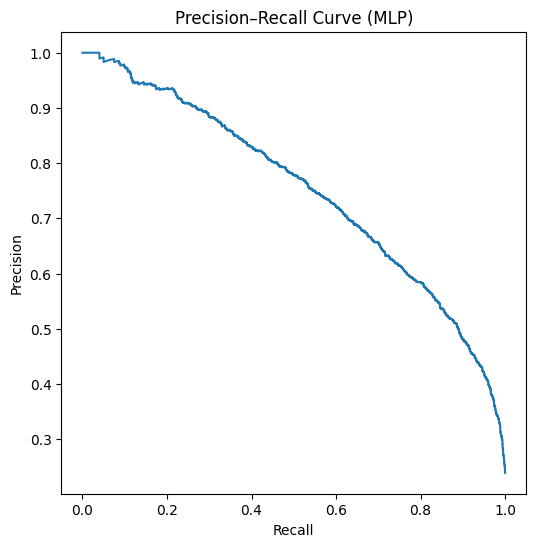

In [8]:
plot_precision_recall(model, X_test, y_test)